### Algorithm: CNN-1D including data engineering
### Dataset:DuckDuckGeese
### Author: Edgar Acuna  
### Created: March 24, 2025

In [2]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 

In [3]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### Training dataset

In [5]:
# loading Training data
X, y = load_data("DuckDuckGeese",split="Train")

 Shape of X =  (50, 1345, 270)
 Shape of y =  (50,)
 New shape of X =  (50, 270, 1345)
 New shape of y =  (50, 5)


In [6]:
print(type(X))

<class 'numpy.ndarray'>


In [7]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [8]:
Xa=X.mean(axis=0).T
Xa=pd.DataFrame(Xa)

In [9]:
Xa.shape

(1345, 270)

In [10]:
#Extracting the time series by class
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
X5=X[yo==4]
print(X3.shape)

(10, 270, 1345)


In [11]:
#Calculating the means of the dimensions in each group
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
Xa5=X5.mean(axis=0).T
Xa5=pd.DataFrame(Xa5)
print(Xa2.shape)

(1345, 270)


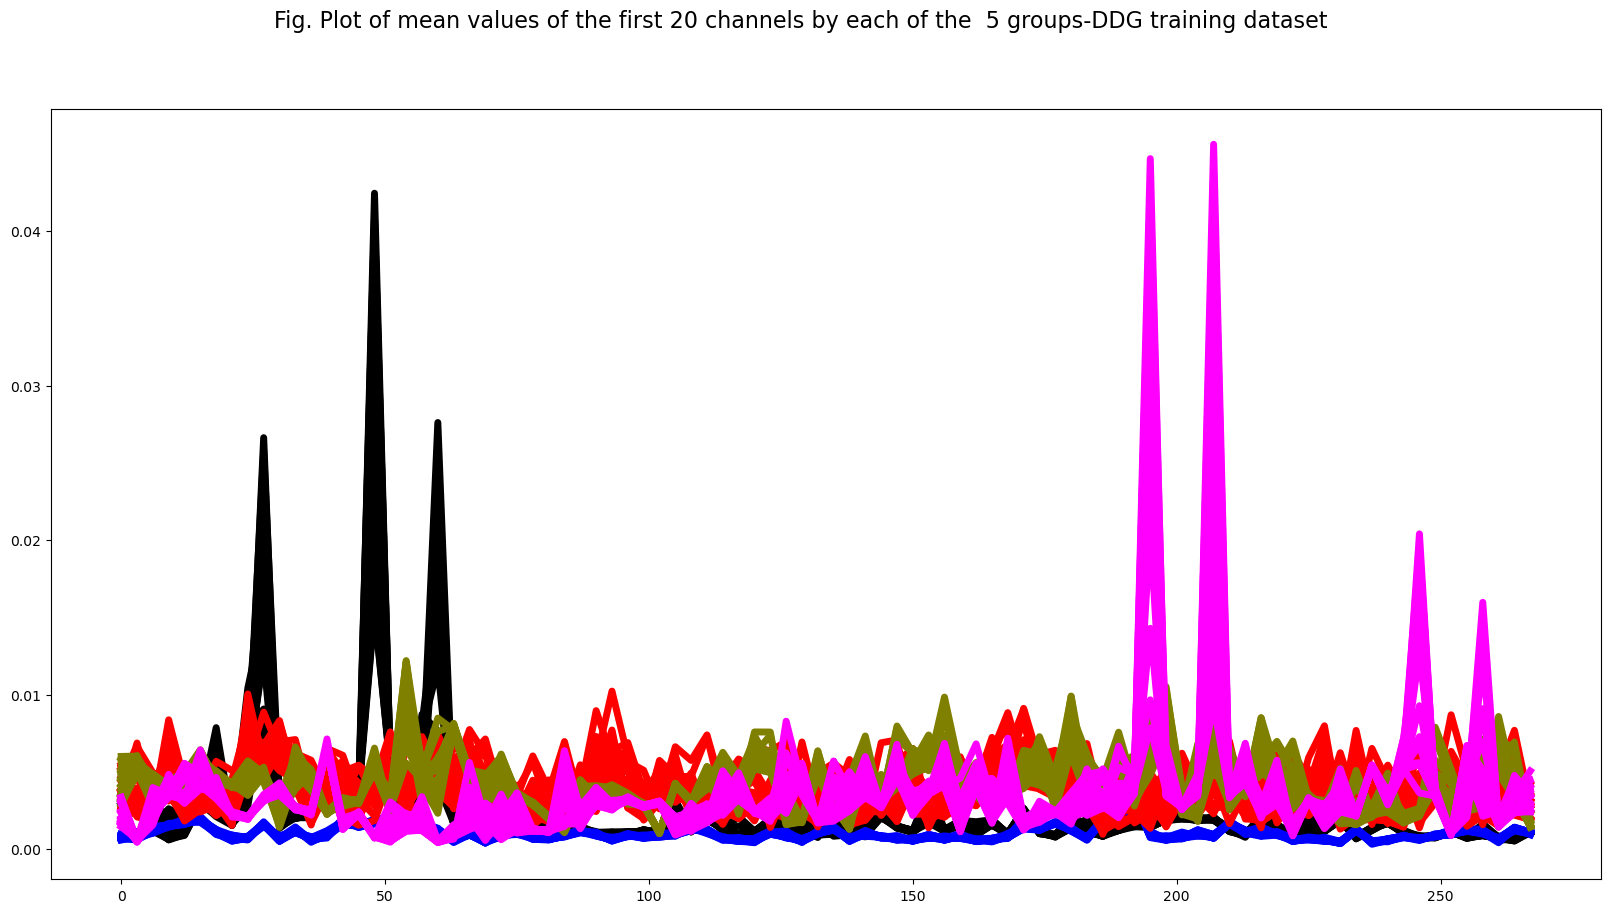

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,270,3)
fig.suptitle("Fig. Plot of mean values of the first 20 channels by each of the  5 groups-DDG training dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[2,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[3,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[4,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[5,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa2.iloc[6,ejex], color='blue',lw=5, label='G2')
ax.plot(ejex, Xa1.iloc[7,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[8,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[9,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[10,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[11,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[12,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[13,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[14,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[15,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa2.iloc[16,ejex], color='blue',lw=5, label='G2')
ax.plot(ejex, Xa1.iloc[17,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[18,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[19,ejex], color='black', lw=5, label='G1')
ax.plot(ejex,Xa2.iloc[0,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[1,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[2,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[3,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[4,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[5,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[6,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[7,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[8,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[9,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[10,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[11,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[12,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[13,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[14,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[15,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[16,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[17,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[18,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[19,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex, Xa3.iloc[0,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[1,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[2,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[3,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[4,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[5,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[6,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[7,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[8,ejex], color='red', lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[9,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[10,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[11,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[12,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[13,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[14,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[15,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[16,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[17,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[18,ejex], color='red', lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[19,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa4.iloc[0,ejex], color='olive',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[1,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[2,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[3,ejex], color='olive',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[4,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[5,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[6,ejex], color='olive',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[7,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[8,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[9,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[10,ejex], color='olive',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[11,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[12,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[13,ejex], color='olive',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[14,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[15,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[16,ejex], color='olive',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[17,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[18,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[19,ejex], color='olive', lw=5,  label='G4')
ax.plot(ejex, Xa5.iloc[0,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[1,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[2,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[3,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[4,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[5,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[6,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[7,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[8,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[9,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[10,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[11,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[12,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[13,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[14,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[15,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[16,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[17,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[18,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[19,ejex], color='magenta', lw=5,  label='G5')
#ax.legend(loc='best', frameon=False)
plt.show()

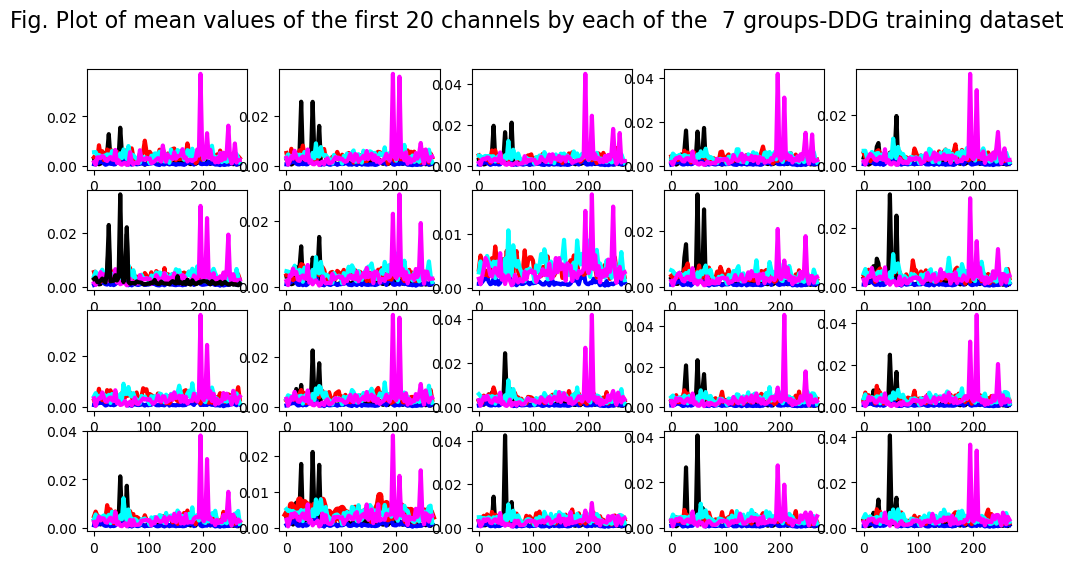

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(4, 5,figsize=(12,6))
ejex=np.arange(0,270,3)
fig.suptitle("Fig. Plot of mean values of the first 20 channels by each of the  7 groups-DDG training dataset",fontsize=16)
ax[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=3, label='G1')
ax[0,0].plot(ejex,Xa2.iloc[0,ejex], color='blue', lw=3,  label='G1')
ax[0,0].plot(ejex, Xa3.iloc[0,ejex], color='red', lw=3, label='G1')
ax[0,0].plot(ejex, Xa4.iloc[0,ejex], color='cyan',lw=3, label='G1')
ax[0,0].plot(ejex,Xa5.iloc[0,ejex], color='magenta', lw=3,  label='G1')
ax[0,1].plot(ejex, Xa1.iloc[1,ejex], color='black',lw=3, label='G1')
ax[0,1].plot(ejex,Xa2.iloc[1,ejex], color='blue', lw=3,  label='G1')
ax[0,1].plot(ejex, Xa3.iloc[1,ejex], color='red', lw=3, label='G1')
ax[0,1].plot(ejex, Xa4.iloc[1,ejex], color='cyan',lw=3, label='G1')
ax[0,1].plot(ejex,Xa5.iloc[11,ejex], color='magenta', lw=3,  label='G1')
ax[0,2].plot(ejex,Xa1.iloc[2,ejex], color='black', lw=3,  label='G1')
ax[0,2].plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=3, label='G1')
ax[0,2].plot(ejex, Xa3.iloc[2,ejex], color='red',lw=3, label='G2')
ax[0,2].plot(ejex, Xa4.iloc[2,ejex], color='cyan',lw=3, label='G1')
ax[0,2].plot(ejex,Xa5.iloc[2,ejex], color='magenta', lw=3,  label='G1')
ax[0,3].plot(ejex,Xa1.iloc[3,ejex], color='black', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa2.iloc[3,ejex], color='blue', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa3.iloc[3,ejex], color='red', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa4.iloc[3,ejex], color='cyan', lw=3,   label='G2')
ax[0,3].plot(ejex,Xa5.iloc[3,ejex], color='magenta', lw=3,   label='G2')
ax[0,4].plot(ejex,Xa1.iloc[4,ejex], color='black', lw=3,   label='G2')
ax[0,4].plot(ejex, Xa2.iloc[4,ejex], color='blue', lw=3, label='G2')
ax[0,4].plot(ejex,Xa3.iloc[4,ejex], color='red', lw=3,   label='G2')
ax[0,4].plot(ejex,Xa4.iloc[4,ejex], color='cyan', lw=3,   label='G2')
ax[0,4].plot(ejex,Xa5.iloc[4,ejex], color='magenta', lw=3,   label='G2')
ax[1,0].plot(ejex, Xa1.iloc[5,ejex], color='black',lw=3, label='G1')
ax[1,0].plot(ejex,Xa2.iloc[5,ejex], color='blue', lw=3,  label='G1')
ax[1,0].plot(ejex, Xa3.iloc[5,ejex], color='red', lw=3, label='G1')
ax[1,0].plot(ejex, Xa4.iloc[5,ejex], color='cyan',lw=3, label='G1')
ax[1,0].plot(ejex,Xa5.iloc[5,ejex], color='magenta', lw=3,  label='G1')
ax[1,1].plot(ejex, Xa1.iloc[6,ejex], color='black',lw=3, label='G1')
ax[1,1].plot(ejex,Xa2.iloc[6,ejex], color='blue', lw=3,  label='G1')
ax[1,1].plot(ejex, Xa3.iloc[6,ejex], color='red', lw=3, label='G1')
ax[1,1].plot(ejex, Xa4.iloc[6,ejex], color='cyan',lw=3, label='G1')
ax[1,1].plot(ejex,Xa5.iloc[6,ejex], color='magenta', lw=3,  label='G1')
ax[1,2].plot(ejex, Xa2.iloc[7,ejex], color='blue', lw=3, label='G1')
ax[1,2].plot(ejex, Xa3.iloc[7,ejex], color='red',lw=3, label='G2')
ax[1,2].plot(ejex, Xa4.iloc[7,ejex], color='cyan',lw=3, label='G1')
ax[1,2].plot(ejex,Xa5.iloc[7,ejex], color='magenta', lw=3,  label='G1')
ax[1,3].plot(ejex,Xa1.iloc[8,ejex], color='black', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa2.iloc[8,ejex], color='blue', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa3.iloc[8,ejex], color='red', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa4.iloc[8,ejex], color='cyan', lw=3,   label='G2')
ax[1,3].plot(ejex,Xa5.iloc[8,ejex], color='magenta', lw=3,   label='G2')
ax[1,4].plot(ejex,Xa1.iloc[9,ejex], color='black', lw=3,   label='G2')
ax[1,4].plot(ejex, Xa2.iloc[9,ejex], color='blue', lw=3, label='G2')
ax[1,4].plot(ejex,Xa3.iloc[9,ejex], color='red', lw=3,   label='G2')
ax[1,4].plot(ejex,Xa4.iloc[9,ejex], color='cyan', lw=3,   label='G2')
ax[1,4].plot(ejex,Xa5.iloc[9,ejex], color='magenta', lw=3,   label='G2')
ax[1,0].plot(ejex, Xa1.iloc[10,ejex], color='black',lw=3, label='G1')
ax[2,0].plot(ejex,Xa2.iloc[10,ejex], color='blue', lw=3,  label='G1')
ax[2,0].plot(ejex, Xa3.iloc[10,ejex], color='red', lw=3, label='G1')
ax[2,0].plot(ejex, Xa4.iloc[10,ejex], color='cyan',lw=3, label='G1')
ax[2,0].plot(ejex,Xa5.iloc[10,ejex], color='magenta', lw=3,  label='G1')
ax[2,1].plot(ejex, Xa1.iloc[11,ejex], color='black',lw=3, label='G1')
ax[2,1].plot(ejex,Xa2.iloc[11,ejex], color='blue', lw=3,  label='G1')
ax[2,1].plot(ejex, Xa3.iloc[11,ejex], color='red', lw=3, label='G1')
ax[2,1].plot(ejex, Xa4.iloc[11,ejex], color='cyan',lw=3, label='G1')
ax[2,1].plot(ejex,Xa5.iloc[11,ejex], color='magenta', lw=3,  label='G1')
ax[2,2].plot(ejex,Xa1.iloc[12,ejex], color='black', lw=3,  label='G1')
ax[2,2].plot(ejex, Xa2.iloc[12,ejex], color='blue', lw=3, label='G1')
ax[2,2].plot(ejex, Xa3.iloc[12,ejex], color='red',lw=3, label='G2')
ax[2,2].plot(ejex, Xa4.iloc[12,ejex], color='cyan',lw=3, label='G1')
ax[2,2].plot(ejex,Xa5.iloc[12,ejex], color='magenta', lw=3,  label='G1')
ax[2,3].plot(ejex,Xa1.iloc[13,ejex], color='black', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa2.iloc[13,ejex], color='blue', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa3.iloc[13,ejex], color='red', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa4.iloc[13,ejex], color='cyan', lw=3,   label='G2')
ax[2,3].plot(ejex,Xa5.iloc[13,ejex], color='magenta', lw=3,   label='G2')
ax[2,4].plot(ejex,Xa1.iloc[14,ejex], color='black', lw=3,   label='G2')
ax[2,4].plot(ejex, Xa2.iloc[14,ejex], color='blue', lw=3, label='G2')
ax[2,4].plot(ejex,Xa3.iloc[14,ejex], color='red', lw=3,   label='G2')
ax[2,4].plot(ejex,Xa4.iloc[14,ejex], color='cyan', lw=3,   label='G2')
ax[2,4].plot(ejex,Xa5.iloc[14,ejex], color='magenta', lw=3,   label='G2')
ax[3,0].plot(ejex, Xa1.iloc[15,ejex], color='black',lw=3, label='G1')
ax[3,0].plot(ejex,Xa2.iloc[15,ejex], color='blue', lw=3,  label='G1')
ax[3,0].plot(ejex, Xa3.iloc[15,ejex], color='red', lw=3, label='G1')
ax[3,0].plot(ejex, Xa4.iloc[15,ejex], color='cyan',lw=3, label='G1')
ax[3,0].plot(ejex,Xa5.iloc[15,ejex], color='magenta', lw=3,  label='G1')
ax[3,1].plot(ejex, Xa1.iloc[16,ejex], color='black',lw=3, label='G1')
ax[3,1].plot(ejex,Xa2.iloc[16,ejex], color='blue', lw=3,  label='G1')
ax[3,1].plot(ejex, Xa3.iloc[16,ejex], color='red', lw=5, label='G1')
ax[3,1].plot(ejex, Xa4.iloc[16,ejex], color='cyan',lw=3, label='G1')
ax[3,1].plot(ejex,Xa5.iloc[16,ejex], color='magenta', lw=3,  label='G1')
ax[3,2].plot(ejex,Xa1.iloc[17,ejex], color='black', lw=3,  label='G1')
ax[3,2].plot(ejex, Xa2.iloc[17,ejex], color='blue', lw=3, label='G1')
ax[3,2].plot(ejex, Xa3.iloc[17,ejex], color='red',lw=3, label='G2')
ax[3,2].plot(ejex, Xa4.iloc[17,ejex], color='cyan',lw=3, label='G1')
ax[3,2].plot(ejex,Xa5.iloc[17,ejex], color='magenta', lw=3,  label='G1')
ax[3,3].plot(ejex,Xa1.iloc[18,ejex], color='black', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa2.iloc[18,ejex], color='blue', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa3.iloc[18,ejex], color='red', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa4.iloc[18,ejex], color='cyan', lw=3,   label='G2')
ax[3,3].plot(ejex,Xa5.iloc[18,ejex], color='magenta', lw=3,   label='G2')
ax[3,4].plot(ejex,Xa1.iloc[19,ejex], color='black', lw=3,   label='G2')
ax[3,4].plot(ejex, Xa2.iloc[19,ejex], color='blue', lw=3, label='G2')
ax[3,4].plot(ejex,Xa3.iloc[19,ejex], color='red', lw=3,   label='G2')
ax[3,4].plot(ejex,Xa4.iloc[19,ejex], color='cyan', lw=3,   label='G2')
ax[3,4].plot(ejex,Xa5.iloc[19,ejex], color='magenta', lw=3,   label='G2')
#ax.legend(loc='best', frameon=False)
plt.show()

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,270,3)
fig.suptitle("Fig. Plot of mean values for the first  100 dimensions-DDG training dataset",fontsize=16)
ax.plot(ejex, Xa.iloc[0,ejex], color='black',lw=5, label='d1')
ax.plot(ejex,Xa.iloc[1,ejex], color='black', lw=5, label='d2')
ax.plot(ejex, Xa.iloc[2,ejex], color='black', lw=5, label='d3')
ax.plot(ejex,Xa.iloc[3,ejex], color='black', lw=5, label='G2')
ax.plot(ejex, Xa.iloc[4,ejex], color='black', lw=5,label='G1')
ax.plot(ejex,Xa.iloc[5,ejex], color='black', lw=5, label='G2')
ax.plot(ejex, Xa.iloc[6,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa.iloc[7,ejex], color='black', lw=5, label='G2')
ax.plot(ejex, Xa.iloc[8,ejex], color='black',lw=5,  label='G1')
ax.plot(ejex, Xa.iloc[9,ejex], color='black',lw=5, label='d1')
ax.plot(ejex,Xa.iloc[10,ejex], color='black', lw=5, label='d2')
ax.plot(ejex, Xa.iloc[11,ejex], color='black', lw=5, label='d3')
ax.plot(ejex,Xa.iloc[12,ejex], color='black', lw=5, label='G2')
ax.plot(ejex, Xa.iloc[13,ejex], color='black', lw=5, label='G1')
ax.plot(ejex,Xa.iloc[14,ejex], color='black', lw=5, label='G2')
ax.plot(ejex, Xa.iloc[15,ejex], color='black',lw=5,  label='G1')
ax.plot(ejex,Xa.iloc[16,ejex], color='black', lw=5, label='G2')
ax.plot(ejex, Xa.iloc[17,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[18,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[19,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[20,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[21,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[22,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[23,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[24,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[25,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[26,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[27,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[28,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[29,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[30,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[31,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[32,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[33,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[34,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[35,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[36,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[37,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[38,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[39,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[40,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[41,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[42,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[43,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[44,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[45,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[46,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[47,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[48,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[49,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[50,ejex], color='black', lw=3, label='G2')
ax.plot(ejex,Xa.iloc[51,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[52,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[53,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[54,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[55,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[56,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[57,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[58,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[59,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[60,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[61,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[62,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[63,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[64,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[65,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[66,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[67,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[68,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[69,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[70,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[71,ejex], color='black',lw=3, label='G1')
ax.plot(ejex, Xa.iloc[72,ejex], color='black',lw=3,  label='G1')
ax.plot(ejex,Xa.iloc[73,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[74,ejex], color='black',lw=3, label='d1')
ax.plot(ejex,Xa.iloc[75,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[76,ejex], color='black', lw=3, label='d3')
ax.plot(ejex,Xa.iloc[77,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[78,ejex], color='black', lw=3, label='G1')
ax.plot(ejex,Xa.iloc[79,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[80,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[81,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[82,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[83,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[84,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[85,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[86,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[87,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[88,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[89,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[90,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[91,ejex], color='black',lw=3, label='G1')
ax.plot(ejex, Xa.iloc[92,ejex], color='black',lw=3,  label='G1')
ax.plot(ejex,Xa.iloc[93,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[94,ejex], color='black',lw=3, label='d1')
ax.plot(ejex,Xa.iloc[95,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[96,ejex], color='black', lw=3, label='d3')
ax.plot(ejex,Xa.iloc[97,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[98,ejex], color='black', lw=3, label='G1')
ax.plot(ejex,Xa.iloc[99,ejex], color='black', lw=3, label='G2')
#ax.legend(loc='best', frameon=False)

### Testing dataset

In [16]:
# loading Testing data
Xt, yt = load_data("DuckDuckGeese",split="Test")

 Shape of X =  (50, 1345, 270)
 Shape of y =  (50,)
 New shape of X =  (50, 270, 1345)
 New shape of y =  (50, 5)


In [17]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([10, 10, 10, 10, 10])

In [18]:
ar=np.sum(yt,axis=0)
np.max(ar/Xt.shape[0])

0.2

In [19]:
tempotr=X.reshape(X.shape[2],-1).T
tempotr=pd.DataFrame(tempotr)
#pyplot.boxplot(tempotr)
#pyplot.show()

In [20]:
tempotr=X.reshape(X.shape[2],-1).T
tempotr=pd.DataFrame(tempotr)
tempotr.mean()

0       0.233080
1       0.195634
2       0.267012
3       0.204374
4       0.212748
          ...   
1340    0.020379
1341    0.020112
1342    0.020564
1343    0.020931
1344    0.020840
Length: 1345, dtype: float64

In [21]:
#Boxplots of each feature inthe groups pf the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
#temptr.boxplot(by='group')
#temptr.groupby('group').mean()

In [22]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([3.44369936, 4.59926837, 4.27819698, 3.36750707, 3.00511409,
       3.94914139, 4.6685479 , 3.29126739, 4.92097259, 3.6033271 ])

In [23]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [24]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(67250, 270)


In [25]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(67250, 270)


### Distances

In [27]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([3.44369936, 4.59926837, 4.27819698, 3.36750707, 3.00511409,
       3.94914139, 4.6685479 , 3.29126739, 4.92097259, 3.6033271 ])

In [28]:
distances.min()

3.005114091537609

In [29]:
distances.max()

4.920972593178763

In [30]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(270,)

In [31]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

In [32]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

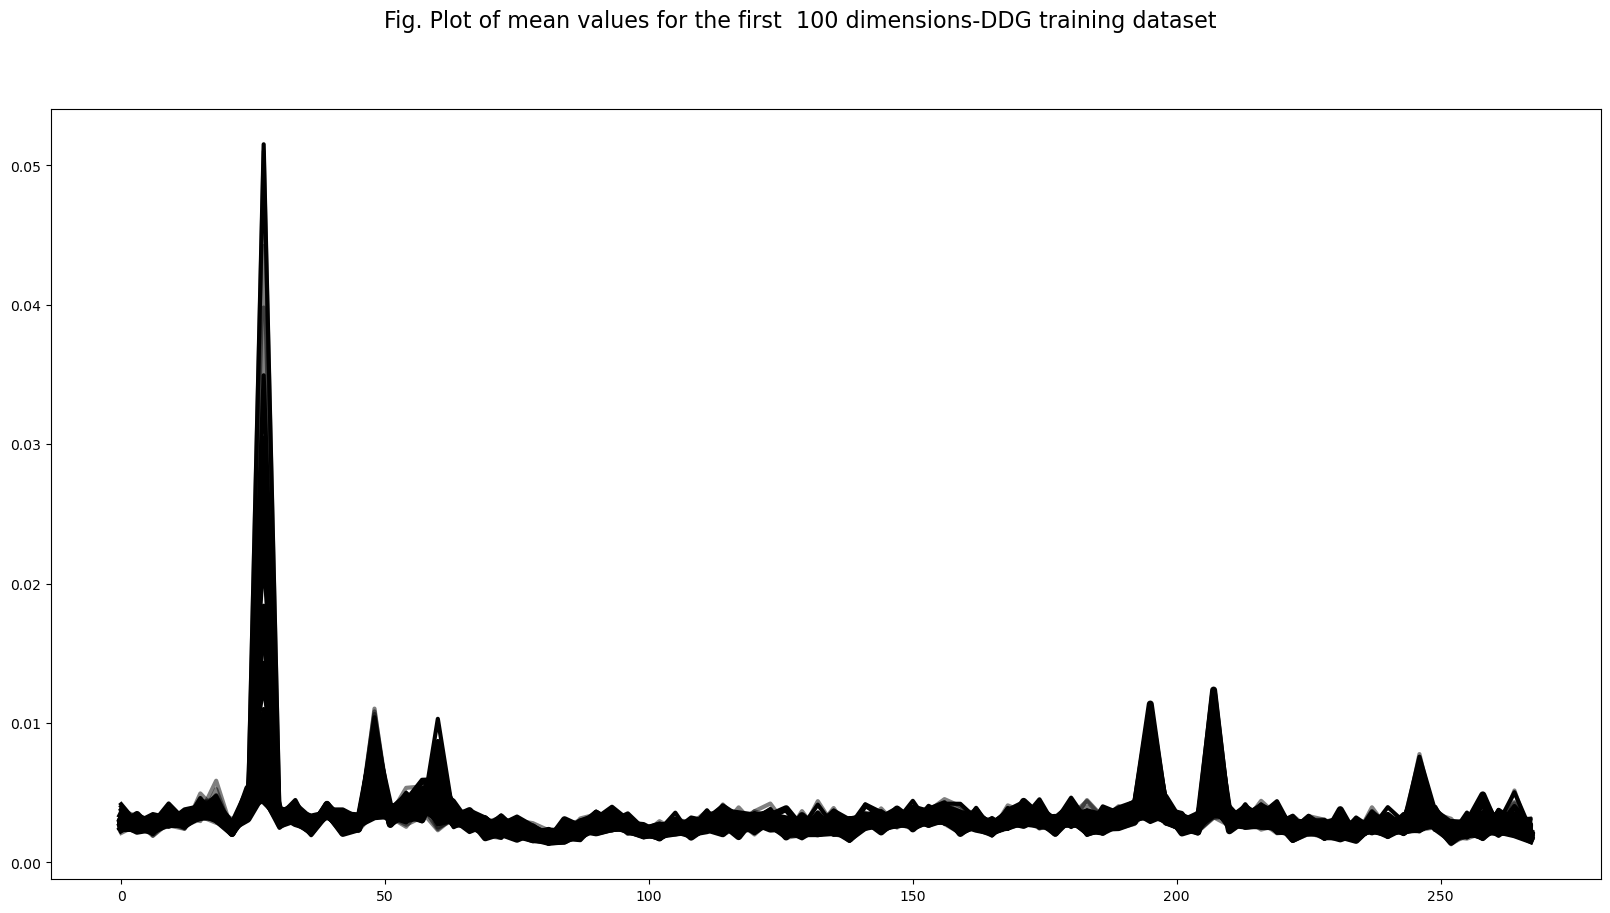

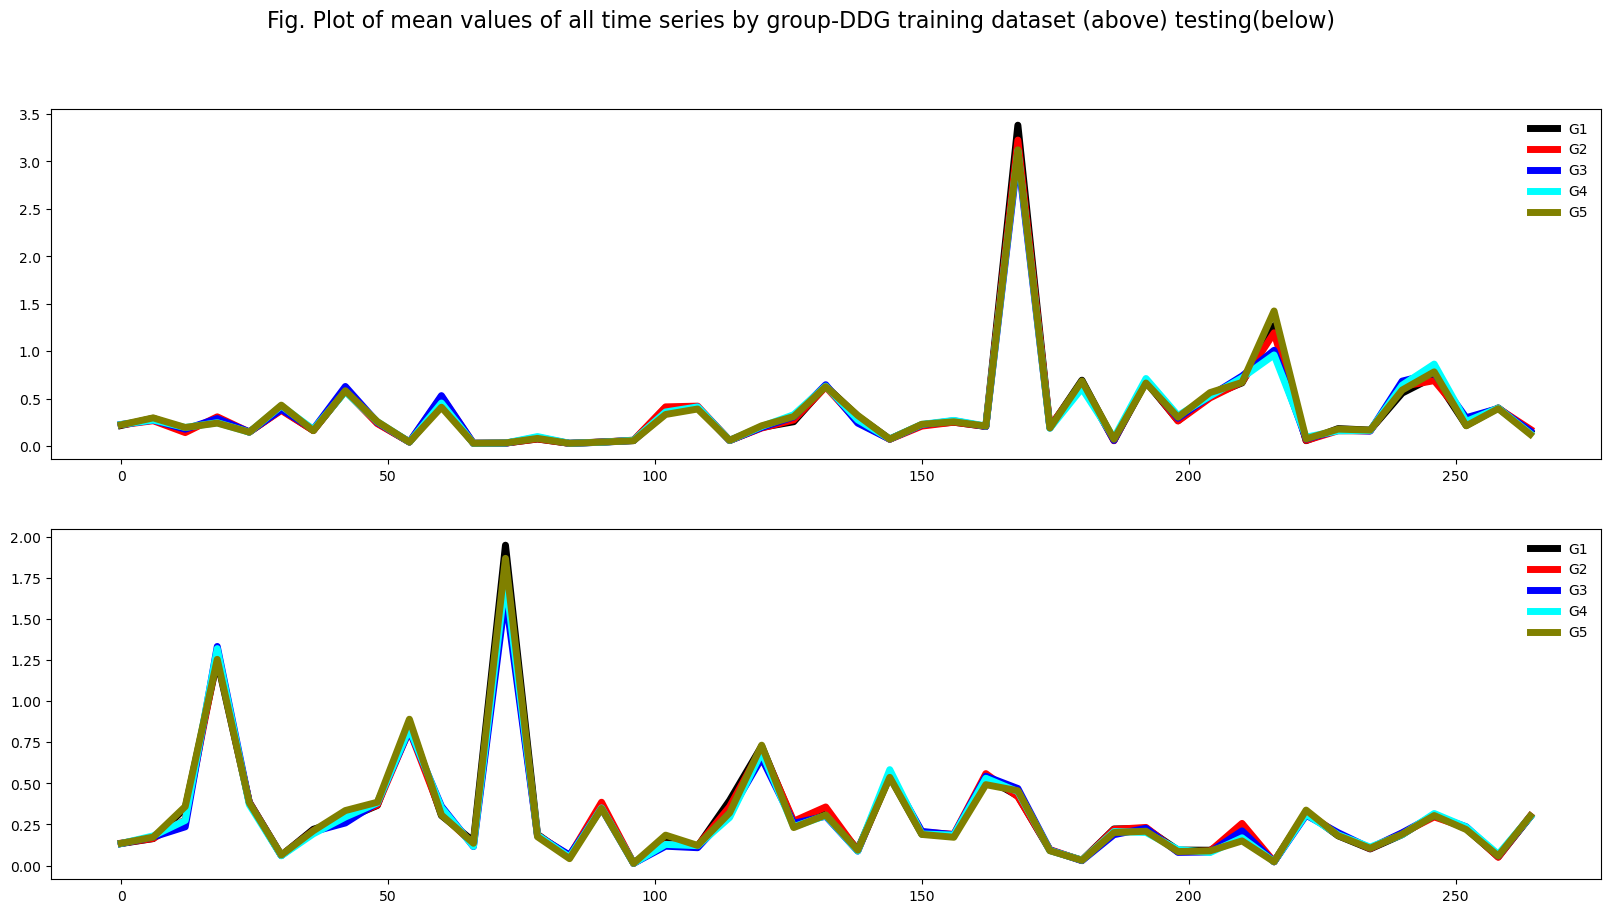

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
ejex=np.arange(0,270,6)
fig.suptitle("Fig. Plot of mean values of all time series by group-DDG training dataset (above) testing(below)",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax1.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax1.plot(ejex, a.iloc[3,ejex], color='cyan', lw=5,  label='G4')
ax1.plot(ejex, a.iloc[4,ejex], color='olive', lw=5, label='G5')
ax1.legend(loc='best', frameon=False)
ax2.plot(ejex, a1.iloc[0,ejex], color='black',lw=5, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=5, label='G2')
ax2.plot(ejex, a1.iloc[2,ejex], color='blue', lw=5, label='G3')
ax2.plot(ejex, a1.iloc[3,ejex], color='cyan', lw=5,  label='G4')
ax2.plot(ejex, a1.iloc[4,ejex], color='olive', lw=5, label='G5')
ax2.legend(loc='best', frameon=False)
plt.show()

### Feature selection

In [35]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:270]
scores = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/270

8.88888888888889

In [36]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores
#critical p-value=.15
importance=[i for i,v in enumerate(scores) if v > .8239]
len(importance)*100/270

50.370370370370374

In [37]:
#Boxplot of features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
#pyplot.boxplot(tempodfte)
#pyplot.show()

(13500, 1345)


In [38]:
#Boxplots of each feature inthe groups pf the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Bboxplot  of features by class
#tempte.boxplot(by='group')

In [39]:
#Distance between the features in the two groups of the treining
means1=tempte.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances1 = pdist(means1, metric='euclidean')
distances1

array([2.97323253, 3.93202372, 3.88289364, 2.82865173, 2.89448114,
       4.02275502, 4.10093915, 2.90314981, 4.16137935, 3.12550149])

In [40]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(100, 270, 1345)


In [41]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(67250, 270)


In [42]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(270,)

In [43]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

8.693465327095062

### Stationarity

In [45]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
Xest = tempoB.iloc[50,0:270]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.136431
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573


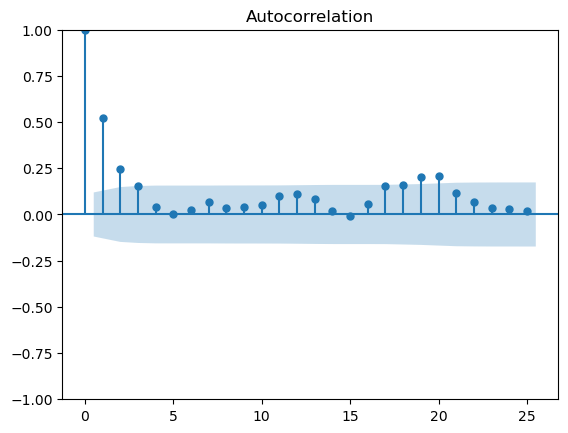

In [46]:
sm.graphics.tsa.plot_acf(Xest, alpha=.05)